In [266]:
import numpy as np
import matplotlib.pyplot as plt

# Procesos de Markov con recompensas

<img src="imgs/mrp.png" alt="MRP" width="500"/>

In [267]:
P = np.array(
    [
        [0.0, 0.5, 0.5, 0.0],
        [0.2, 0.0, 0.0, 0.8],
        [0.8, 0.0, 0.0, 0.2],
        [0.0, 0.2, 0.2, 0.6],
    ]
)

In [268]:
nS = 4

In [269]:
R = np.array([0, 0, 0, 1])

In [270]:
gamma = 0.8

# Cálculo de la función de valor

In [271]:
A = np.eye(nS) - gamma * P
b = R
V = np.linalg.inv(A) @ R

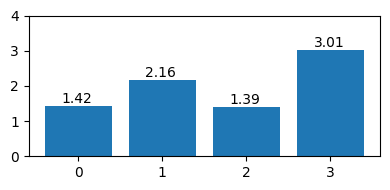

In [272]:
plt.figure(figsize=(4, 2))
plt.bar(range(nS), V.flatten())
plt.ylim(0, 4)
for i, v in enumerate(V.flatten()):
    plt.text(i - 0.2, v + 0.1, np.around(v, 2))
plt.tight_layout()
plt.show()

# Ecuación de Bellman 

In [274]:
V = np.zeros(nS)
Vs = [V]
for _ in range(40):
    V = R + gamma * P @ V
    Vs.append(V)

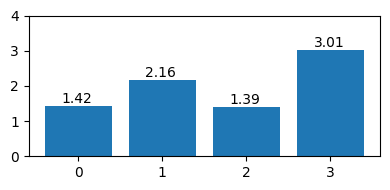

In [275]:
plt.figure(figsize=(4, 2))
plt.bar(range(nS), V)
plt.ylim(0, 4)
for i, v in enumerate(V):
    plt.text(i - 0.2, v + 0.1, np.around(v, 2))
plt.tight_layout()
plt.show()

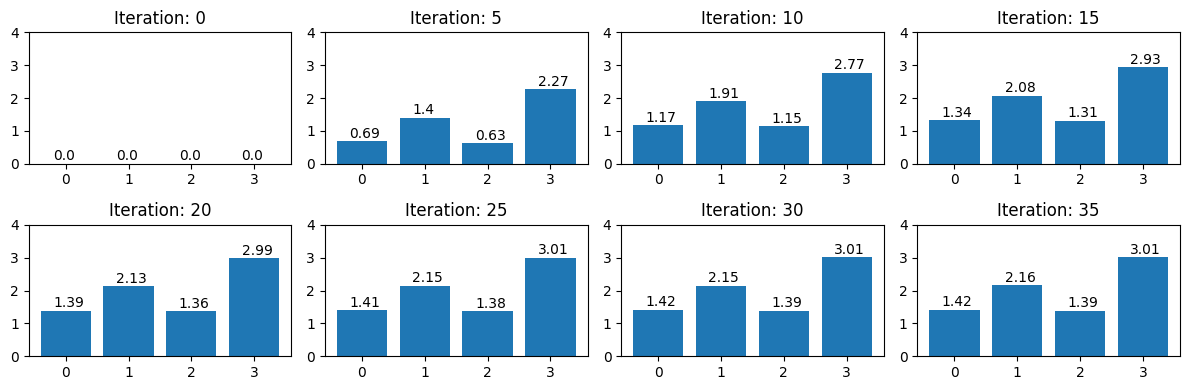

In [276]:
fig, axes = plt.subplots(2, 4, figsize=(12, 4))
axes = axes.flatten()
for i in range(8):
    axes[i].set_title(f'Iteration: {i*5}')
    axes[i].bar(range(nS), Vs[i*5])
    axes[i].set_ylim(0, 4)
    for j, v in enumerate(Vs[i*5]):
        axes[i].text(j - 0.2, v + 0.1, np.around(v, 2))
plt.tight_layout()
plt.show()

# Función de valor de un estado via Monte-Carlo

In [277]:
V = np.zeros(nS)
for _ in range(10000):
    V = R + P @ V

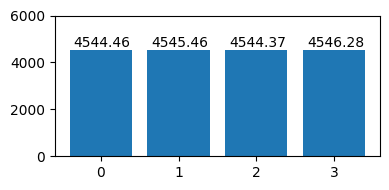

In [279]:
plt.figure(figsize=(4, 2))
plt.bar(range(nS), V)
plt.ylim(0, 6000)
for i, v in enumerate(V):
    plt.text(i - 0.35, v + 100, np.around(v, 2))
plt.tight_layout()
plt.show()

In [280]:
N = 100000
Gs = []
for _ in range(N):
    G = 0
    s = 0
    for i in range(50):
        r = R[s]
        G += (gamma**i) * r
        p = P[s, :]
        s = np.random.choice(nS, p=p)
    Gs.append(G)
V = sum(Gs) / N
print(f"Estimated Value Function: {np.around(V, 2)}")

Estimated Value Function: 1.41


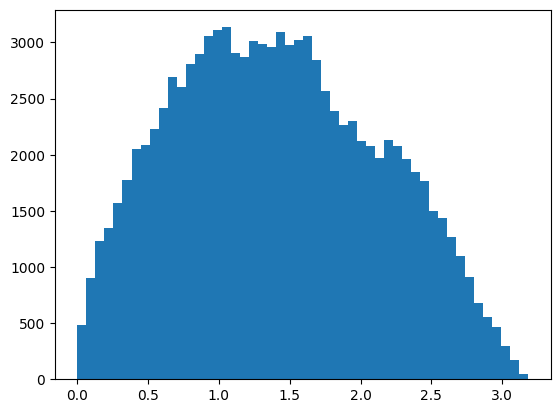

In [281]:
plt.hist(Gs, bins=50);